<a href="https://colab.research.google.com/github/chris051091/Tesis_Maestria/blob/main/preprocess/src/Testeo_Presi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes - Presión

In [1]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [46]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_FIGURE = '/histograms/'

# NOMBRE_ESTACION = 'chucuri'
# RANGE_PRESION = [850, 900]
# NOMBRE_ESTACION = 'palanquero'
# RANGE_PRESION = [980, 1000]
NOMBRE_ESTACION = 'vizcaina'
RANGE_PRESION = [990, 1010]


PATH_FINAL_DADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/'
PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_PROCESADOS = NOMBRE_ESTACION.lower() + '_procesado.csv'
FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_pres.csv'


In [47]:
df = pd.read_csv(PATH_FINAL_DADOS + FILE_DATOS_PROCESADOS,
                 sep = ';',
                 parse_dates = ["FECHA"],
                 date_parser = lambda col: pd.to_datetime(col)
                )

dfVar = df[['FECHA', 'PRESION']].copy()
dfVar = dfVar.sort_values(by=['FECHA']).reset_index(drop = True)
dfVar

,FECHA,PRESION
0,2011-01-01 01:00:00-05:00,697.7
1,2011-01-01 02:00:00-05:00,697.1
2,2011-01-01 03:00:00-05:00,697.1
3,2011-01-01 04:00:00-05:00,697.6
4,2011-01-01 05:00:00-05:00,698.2
...,...,...
52238,2017-12-31 19:00:00-05:00,998.7
52239,2017-12-31 20:00:00-05:00,999.6
52240,2017-12-31 21:00:00-05:00,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1


## Test de rango fijo

In [48]:
pres_max = float(RANGE_PRESION[1])
pres_min = float(RANGE_PRESION[0])
lamb_func = lambda r: np.nan if ((r > pres_max) | (r < pres_min)) else r

dfVar['PRESION_RANGO_FIJO'] = dfVar['PRESION'].apply(lamb_func)
dfVar

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,697.7,NaN
1,2011-01-01 02:00:00-05:00,697.1,NaN
2,2011-01-01 03:00:00-05:00,697.1,NaN
3,2011-01-01 04:00:00-05:00,697.6,NaN
4,2011-01-01 05:00:00-05:00,698.2,NaN
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


<Axes: xlabel='FECHA', ylabel='PRESION_RANGO_FIJO'>

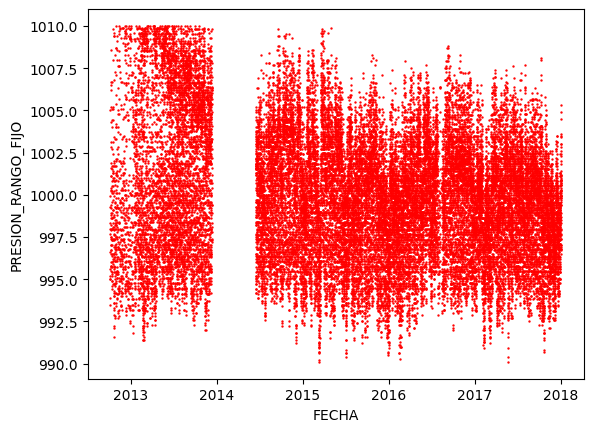

In [73]:
#ax = dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION')
dfVar.plot(kind = 'scatter', x='FECHA', y='PRESION_RANGO_FIJO', color='red', s=0.5)

In [50]:
## Para filtrar los valores finales
dfFinal = dfVar[~dfVar['PRESION_RANGO_FIJO'].isnull()]
dfFinal

,FECHA,PRESION,PRESION_RANGO_FIJO
14004,2012-10-05 12:00:00-05:00,999.3,999.3
14005,2012-10-05 13:00:00-05:00,997.7,997.7
14006,2012-10-05 15:00:00-05:00,995.2,995.2
14007,2012-10-05 16:00:00-05:00,995.0,995.0
14008,2012-10-05 17:00:00-05:00,995.6,995.6
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


In [51]:
print(dfFinal['PRESION'].max())
#print(dfFinal['PRESION_MAX_DIARIA'].max())
print(dfFinal['PRESION'].mean())

1010.0
999.9038175975176


In [52]:
print(dfFinal['PRESION'].min())
#print(dfFinal['TEMP_MIN_DIARIA'].min())

990.1


In [53]:
print(f'Datos iniciales : {dfVar.shape[0]}')
print(f'Datos nulos : {dfVar[dfVar["PRESION"].isnull()].shape[0]}')
dfPresion_null= dfVar[dfVar["PRESION"].isnull()]
print(f'Datos nulos después de los testes : {dfFinal[dfFinal["PRESION_RANGO_FIJO"].isnull()].shape[0]}')
print(f'Datos finales después de testes : {dfFinal.shape[0]}')
print(f'Datos no nulos que fueron eliminados en los testes : {dfVar.shape[0] - dfFinal.shape[0] - dfVar[dfVar["PRESION"].isnull()].shape[0]}')

Datos iniciales : 52243
Datos nulos : 1090
Datos nulos después de los testes : 0
Datos finales después de testes : 36096
Datos no nulos que fueron eliminados en los testes : 15057


In [54]:
dfFinal[['FECHA', 'PRESION']].to_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS, header=True, index=False, sep = ';')

In [55]:
dfPresion_null['FECHA'] = pd.to_datetime(dfPresion_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')

<ipython-input-55-ec29ab24148b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['FECHA'] = pd.to_datetime(dfPresion_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')


In [56]:
dfPresion_null['HORA_FECHA'] = dfPresion_null['FECHA'].dt.hour
dfPresion_null['MES_FECHA'] = dfPresion_null['FECHA'].dt.month
dfPresion_null['ANO_FECHA'] = dfPresion_null['FECHA'].dt.year
dfPresion_null

<ipython-input-56-720e0d95720e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['HORA_FECHA'] = dfPresion_null['FECHA'].dt.hour
<ipython-input-56-720e0d95720e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPresion_null['MES_FECHA'] = dfPresion_null['FECHA'].dt.month
<ipython-input-56-720e0d95720e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,FECHA,PRESION,PRESION_RANGO_FIJO,HORA_FECHA,MES_FECHA,ANO_FECHA
1089,2011-02-15 10:00:00-05:00,NaN,NaN,10,2,2011
1112,2011-02-16 09:00:00-05:00,NaN,NaN,9,2,2011
1113,2011-02-16 10:00:00-05:00,NaN,NaN,10,2,2011
1114,2011-02-16 11:00:00-05:00,NaN,NaN,11,2,2011
1115,2011-02-16 12:00:00-05:00,NaN,NaN,12,2,2011
...,...,...,...,...,...,...
50436,2017-10-14 17:00:00-05:00,NaN,NaN,17,10,2017
50696,2017-10-25 17:00:00-05:00,NaN,NaN,17,10,2017
50762,2017-10-28 15:00:00-05:00,NaN,NaN,15,10,2017
50930,2017-11-04 15:38:56-05:00,NaN,NaN,15,11,2017


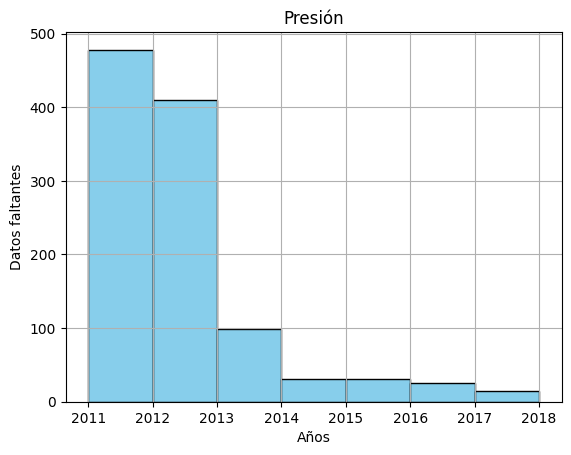

In [57]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['ANO_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(2011, 2019))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim()
ax.grid(True)
ax.set_xlabel("Años")
ax.set_xticks(range(2011, 2019))
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_año_datos_faltantes_pres_{NOMBRE_ESTACION}.png', format='png')

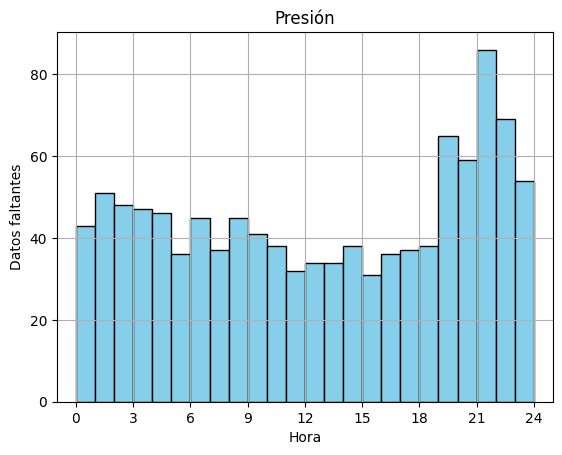

In [58]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['HORA_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_hora_datos_faltantes_Pres_{NOMBRE_ESTACION}.png', format='png')

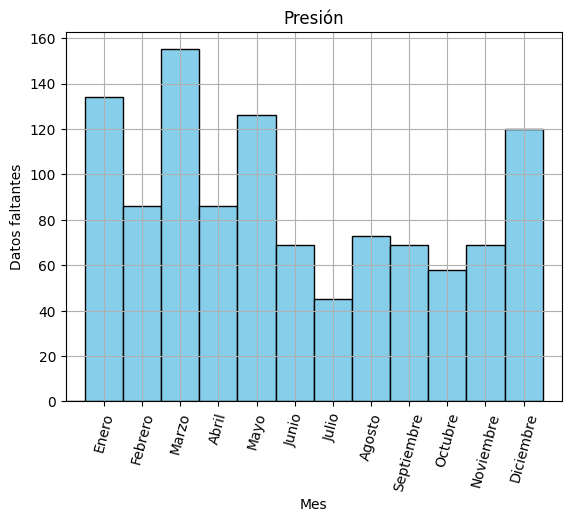

In [59]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPresion_null['MES_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title('Presión')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_mes_datos_faltantes_Pres_{NOMBRE_ESTACION}.png', format='png')

In [60]:
dfFinal

,FECHA,PRESION,PRESION_RANGO_FIJO
14004,2012-10-05 12:00:00-05:00,999.3,999.3
14005,2012-10-05 13:00:00-05:00,997.7,997.7
14006,2012-10-05 15:00:00-05:00,995.2,995.2
14007,2012-10-05 16:00:00-05:00,995.0,995.0
14008,2012-10-05 17:00:00-05:00,995.6,995.6
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


In [61]:
dfVar

,FECHA,PRESION,PRESION_RANGO_FIJO
0,2011-01-01 01:00:00-05:00,697.7,NaN
1,2011-01-01 02:00:00-05:00,697.1,NaN
2,2011-01-01 03:00:00-05:00,697.1,NaN
3,2011-01-01 04:00:00-05:00,697.6,NaN
4,2011-01-01 05:00:00-05:00,698.2,NaN
...,...,...,...
52238,2017-12-31 19:00:00-05:00,998.7,998.7
52239,2017-12-31 20:00:00-05:00,999.6,999.6
52240,2017-12-31 21:00:00-05:00,1000.3,1000.3
52241,2017-12-31 22:00:00-05:00,1001.1,1001.1


## Análisis de datos faltantes

In [62]:
from calendar import isleap

In [63]:
dfEliminados = dfVar[dfVar["PRESION_RANGO_FIJO"].isnull()].reset_index(drop=True)[['FECHA', 'PRESION']].copy()
dfEliminados['HORA_FECHA'] = dfEliminados['FECHA'].dt.hour
dfEliminados['MES_FECHA'] = dfEliminados['FECHA'].dt.month
dfEliminados['ANO_FECHA'] = dfEliminados['FECHA'].dt.year
dfEliminados['DIAS_EN_MES'] = dfEliminados['FECHA'].dt.days_in_month
dfEliminados['DIAS_EN_ANO'] = dfEliminados["ANO_FECHA"].apply(lambda x:365 + isleap(x))

In [64]:
dfEliminados

,FECHA,PRESION,HORA_FECHA,MES_FECHA,ANO_FECHA,DIAS_EN_MES,DIAS_EN_ANO
0,2011-01-01 01:00:00-05:00,697.7,1,1,2011,31,365
1,2011-01-01 02:00:00-05:00,697.1,2,1,2011,31,365
2,2011-01-01 03:00:00-05:00,697.1,3,1,2011,31,365
3,2011-01-01 04:00:00-05:00,697.6,4,1,2011,31,365
4,2011-01-01 05:00:00-05:00,698.2,5,1,2011,31,365
...,...,...,...,...,...,...,...
16142,2017-10-14 17:00:00-05:00,NaN,17,10,2017,31,365
16143,2017-10-25 17:00:00-05:00,NaN,17,10,2017,31,365
16144,2017-10-28 15:00:00-05:00,NaN,15,10,2017,31,365
16145,2017-11-04 15:38:56-05:00,NaN,15,11,2017,30,365


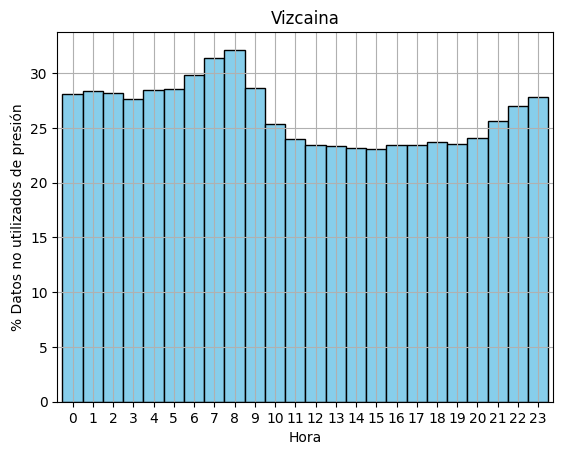

In [65]:
dfEliminados_HORA = (dfEliminados.groupby('HORA_FECHA')
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0])
      )

dfEliminados_HORA["TOTAL_FALTANTES"] = dfEliminados_HORA[("HORA_FECHA", "count")]
dfEliminados_HORA["HORA"] = dfEliminados_HORA[("HORA_FECHA", "")]
dfEliminados_HORA["TOTAL_HORA"] = 7*365
dfEliminados_HORA["PORC_HORA_FALTANTE"] = dfEliminados_HORA["TOTAL_FALTANTES"] / dfEliminados_HORA["TOTAL_HORA"] * 100

fig, ax = plt.subplots()

dfEliminados_HORA.plot.bar(x='HORA', y='PORC_HORA_FALTANTE', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_hora_{NOMBRE_ESTACION}.png', format='png')

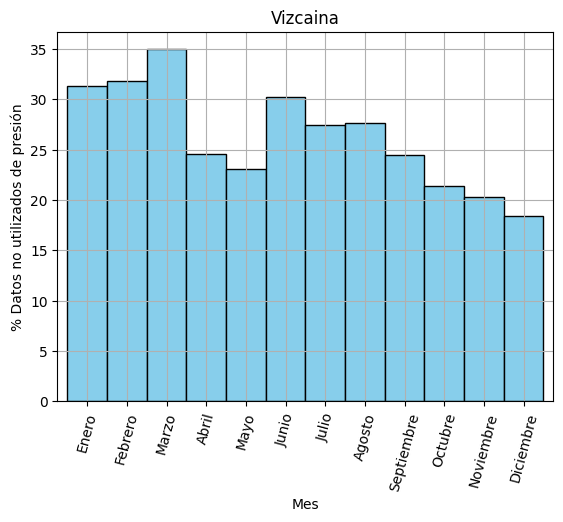

In [66]:
dfEliminados_MES = (dfEliminados
       .groupby(['MES_FECHA', 'ANO_FECHA', 'DIAS_EN_MES'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1, 2])
      )

dfEliminados_MES["TOTAL_FALTANTES"] = dfEliminados_MES[("HORA_FECHA", "count")]
dfEliminados_MES = dfEliminados_MES.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] = dfEliminados_MES['DIAS_EN_MES']*24*7
dfEliminados_MES["PORC_DATOS_POR_MES_ANO_FALTANTE"] = dfEliminados_MES["TOTAL_FALTANTES"] / dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] * 100
dfEliminados_MES.columns=dfEliminados_MES.columns.droplevel(1)
dfEliminados_MES.reset_index(inplace=True)
dfEliminados_MES = (dfEliminados_MES
       .groupby('MES_FECHA')
       .agg({'PORC_DATOS_POR_MES_ANO_FALTANTE': ['sum']})
       .reset_index(level = [0])
      )
dfEliminados_MES["PORC_MES_FALTANTES"] = dfEliminados_MES[("PORC_DATOS_POR_MES_ANO_FALTANTE", "sum")]

fig, ax = plt.subplots()

dfEliminados_MES.plot.bar(x='MES_FECHA', y='PORC_MES_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_mes_{NOMBRE_ESTACION}.png', format='png')

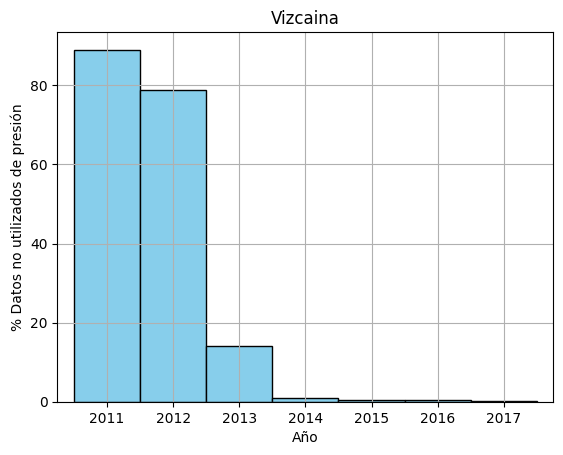

In [67]:
dfEliminados_ANO = (dfEliminados
       .groupby(['ANO_FECHA', 'DIAS_EN_ANO'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1])
      )

dfEliminados_ANO["TOTAL_FALTANTES"] = dfEliminados_ANO[("HORA_FECHA", "count")]
dfEliminados_ANO = dfEliminados_ANO.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] = dfEliminados_ANO['DIAS_EN_ANO']*24
dfEliminados_ANO["PORC_ANO_FALTANTES"] = dfEliminados_ANO["TOTAL_FALTANTES"] / dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] * 100
dfEliminados_ANO
fig, ax = plt.subplots()

dfEliminados_ANO.plot.bar(x='ANO_FECHA', y='PORC_ANO_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Año")
ax.set_ylabel("% Datos no utilizados de presión")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Pres_ano_{NOMBRE_ESTACION}.png', format='png')